In [115]:
import pandas as pd
import pylab as P
import numpy as np

In [116]:
#Load datasets of relevance

Ade_subset = pd.read_csv('../ADE20K_labels/Ade20K_labels_local.txt').set_index('filename')

MissingIndex = pd.read_csv('../masks-ade-4/AtrFileIndexError_20210413-200239.csv', header = None,names = ['category','filepath'])

SegMissing = pd.read_csv('../masks-ade-4/SegMasksNotFound_20210413-200239.csv')


In [117]:
MissingIndex['Filenames'] = [i[-1] for i in MissingIndex.filepath.str.split('/')]

In [118]:
SegMissing['Filenames'] = [i[-1] for i in SegMissing.filepath.str.split('/')]

In [119]:
MissingIndex = MissingIndex.set_index('Filenames')

In [120]:
SegMissing = SegMissing.set_index('Filenames')

In [121]:
#Drop non index rows
Ade_subset = Ade_subset.drop(MissingIndex.index, axis=0)

In [122]:
Ade_subset = Ade_subset.drop(SegMissing.index, axis=0)

In [124]:
Ade_subset.reset_index(inplace=True)

In [126]:
Ade_subset = Ade_subset[['condition', 'object', 'filepath', 'filename']]

In [130]:
Ade_subset.to_csv('../ADE20K_labels/Ade20K_labels_local_subset.txt')

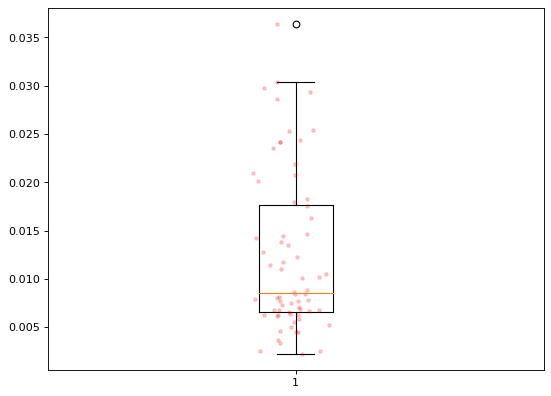

In [57]:
#Compute aggregate statistics to see percent of missing index objects, and plot it

missindex_pd = pd.DataFrame({'countNoIndex' : MissingIndex.groupby('category').filepath.count()})
AdeCount_pd = pd.DataFrame({'count' : Ade_subset.groupby('object').filepath.count()})
Combinedf = missindex_pd.merge(AdeCount_pd, left_index=True, right_index=True)
percentAffected = Combinedf['countNoIndex']/Combinedf['count']

P.figure(figsize=(8, 6), dpi=80)

bp = P.boxplot(percentAffected)
y = percentAffected
x = np.random.normal(1, 0.04, size=len(y))
P.plot(x, y, 'r.', alpha=0.2)
P.show()


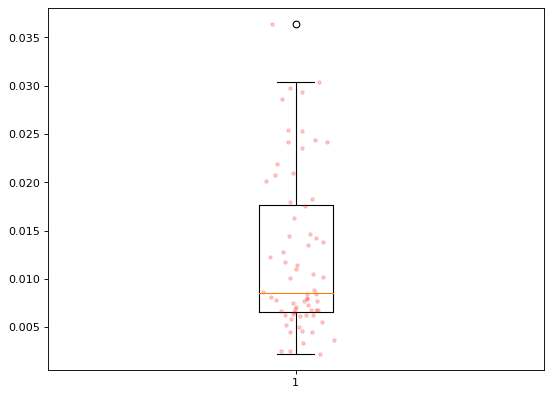

In [52]:
percentAffected[percentAffected>0.025]

beacon      0.036364
bench       0.030345
blanket     0.025316
mountain    0.028633
road        0.029750
sand        0.029326
sea         0.025424
dtype: float64

In [53]:
Ade_subset.head()

,condition,object,filepath,filename
0,1,airplane,../../adeContext-datasets/ADE20K/ADE20K_2016_0...,ADE_train_00001024
1,1,airplane,../../adeContext-datasets/ADE20K/ADE20K_2016_0...,ADE_train_00001025
2,1,airplane,../../adeContext-datasets/ADE20K/ADE20K_2016_0...,ADE_train_00001026
3,1,airplane,../../adeContext-datasets/ADE20K/ADE20K_2016_0...,ADE_train_00001027
4,1,airplane,../../adeContext-datasets/ADE20K/ADE20K_2016_0...,ADE_train_00001028


In [56]:
MissingIndex.head()


,category,filepath
0,airplane,../../adeContext-datasets/ADE20K/ADE20K_2016_0...
1,airplane,../../adeContext-datasets/ADE20K/ADE20K_2016_0...
2,armchair,../../adeContext-datasets/ADE20K/ADE20K_2016_0...
3,armchair,../../adeContext-datasets/ADE20K/ADE20K_2016_0...
4,armchair,../../adeContext-datasets/ADE20K/ADE20K_2016_0...
